In [1]:
# Reference: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
# Data: https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.1.0/pbmc3k?
# Satija et al., 2015

In [3]:
import numpy as np
import scanpy as sc
import pandas as pd


In [4]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

# Verbosity levels are used to control the amount and type of output (logs) you see during the execution of scanpy functions
# The header generally includes information about the scanpy version, the versions of its dependencies, and possibly system information like the number of cores
# dpi=80 sets the dots-per-inch resolution of the figures. This affects the quality and size of your plots.
# facecolor='white' sets the background color of the figures to white.

2023-12-20 23:18:31.045793: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.24.3 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


In [5]:
adata = sc.read_10x_mtx('filtered_gene_bc_matrices/hg19/', 
                       var_names = 'gene_symbols',
                       cache=True)

... reading from cache file cache/filtered_gene_bc_matrices-hg19-matrix.h5ad


/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [6]:
adata.var_names_make_unique()

In [7]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


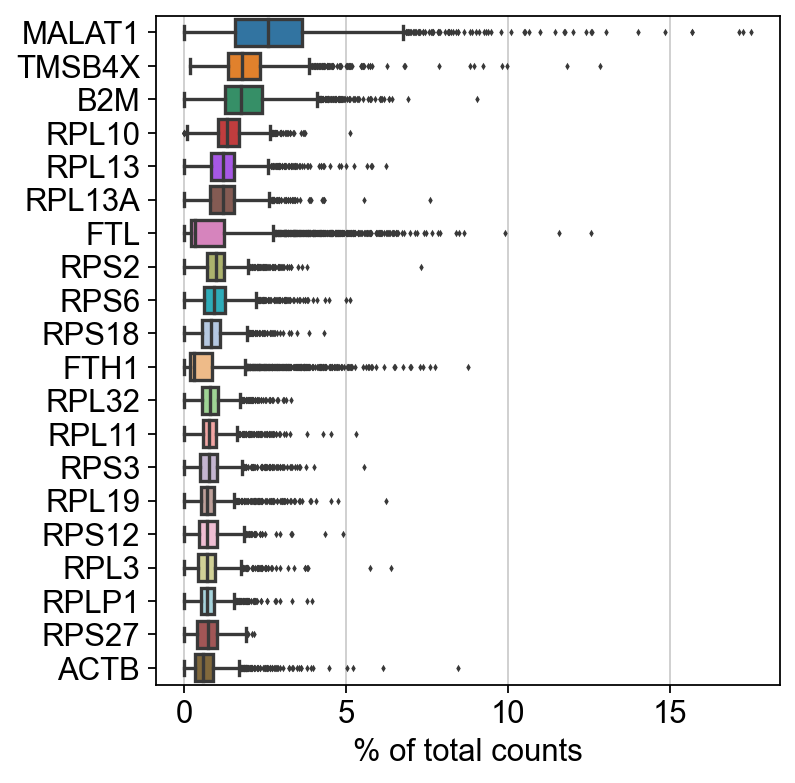

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20, ) #pl : plotting


In [9]:
# Basic preprocessing

sc.pp.filter_cells(adata, min_genes=200) # n_genes
sc.pp.filter_genes(adata, min_cells=3) # n_cells

filtered out 19024 genes that are detected in less than 3 cells


In [10]:
adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [11]:
adata.var.head(5)

gene_ids  n_cells
AL627309.1     ENSG00000237683        9
AP006222.2     ENSG00000228463        3
RP11-206L10.2  ENSG00000228327        5
RP11-206L10.9  ENSG00000237491        3
LINC00115      ENSG00000225880       18

In [12]:
adata.var['n_cells'].head(5)

AL627309.1        9
AP006222.2        3
RP11-206L10.2     5
RP11-206L10.9     3
LINC00115        18
Name: n_cells, dtype: int64

In [13]:
# to make boolean if a gene is mitochondrial gene
adata.var['mt'] = adata.var_names.str.startswith('MT-')


In [14]:
adata.var.head(5)

gene_ids  n_cells     mt
AL627309.1     ENSG00000237683        9  False
AP006222.2     ENSG00000228463        3  False
RP11-206L10.2  ENSG00000228327        5  False
RP11-206L10.9  ENSG00000237491        3  False
LINC00115      ENSG00000225880       18  False

In [15]:
# this is used for calculating quality control metrics. This function is a part of the preprocessing ('pp') module in scanpy
# qc_vars=['mt'] : This parameter specifies that 'mt' should be treated as quality control variables
# percent_top=None : used to specify a list of percentages for which to compute the fraction of counts

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [16]:
adata.var.head(5)

#note the names of all columns after running sc.pp.calculate_qc_metrics ()

gene_ids  n_cells     mt  n_cells_by_counts  \
AL627309.1     ENSG00000237683        9  False                  9   
AP006222.2     ENSG00000228463        3  False                  3   
RP11-206L10.2  ENSG00000228327        5  False                  5   
RP11-206L10.9  ENSG00000237491        3  False                  3   
LINC00115      ENSG00000225880       18  False                 18   

               mean_counts  pct_dropout_by_counts  total_counts  
AL627309.1        0.003333              99.666667           9.0  
AP006222.2        0.001111              99.888889           3.0  
RP11-206L10.2     0.001852              99.814815           5.0  
RP11-206L10.9     0.001111              99.888889           3.0  
LINC00115         0.006667              99.333333          18.0

In [17]:
adata.obs.head(5)

#note the names of all columns after running sc.pp.calculate_qc_metrics ()

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACATACAACCAC-1      781                779        2419.0             73.0   
AAACATTGAGCTAC-1     1352               1352        4903.0            186.0   
AAACATTGATCAGC-1     1131               1129        3147.0             28.0   
AAACCGTGCTTCCG-1      960                960        2639.0             46.0   
AAACCGTGTATGCG-1      522                521         980.0             12.0   

                  pct_counts_mt  
AAACATACAACCAC-1       3.017776  
AAACATTGAGCTAC-1       3.793596  
AAACATTGATCAGC-1       0.889736  
AAACCGTGCTTCCG-1       1.743085  
AAACCGTGTATGCG-1       1.224490

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


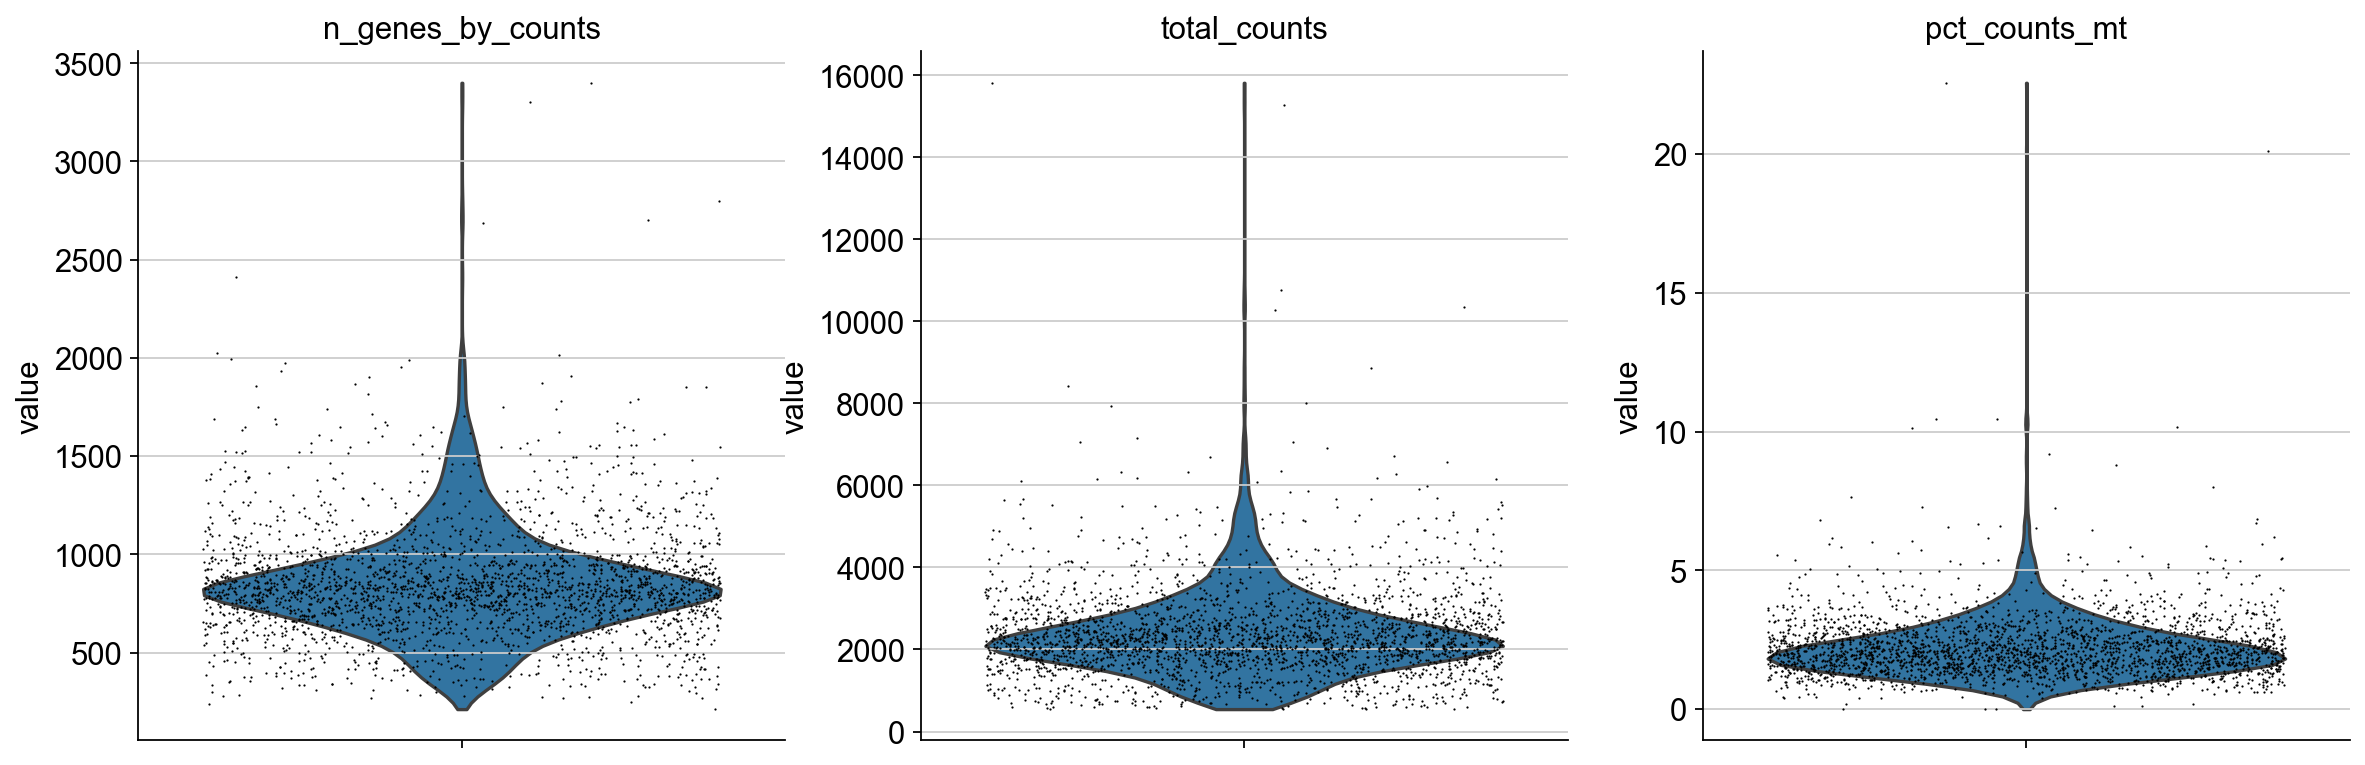

In [18]:
# To plot several qc metrics that were generated.

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
            jitter=0.4, multi_panel=True)

In [165]:
# To check the names of columns of var
adata.var.columns

Index(['gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts',
       'pct_dropout_by_counts', 'total_counts'],
      dtype='object')

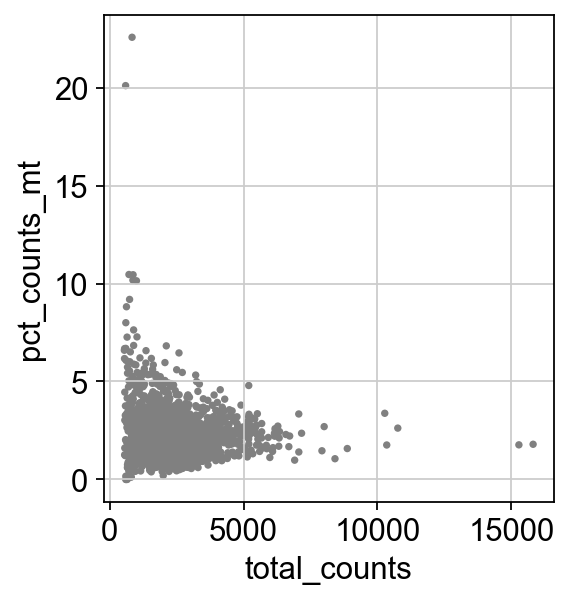

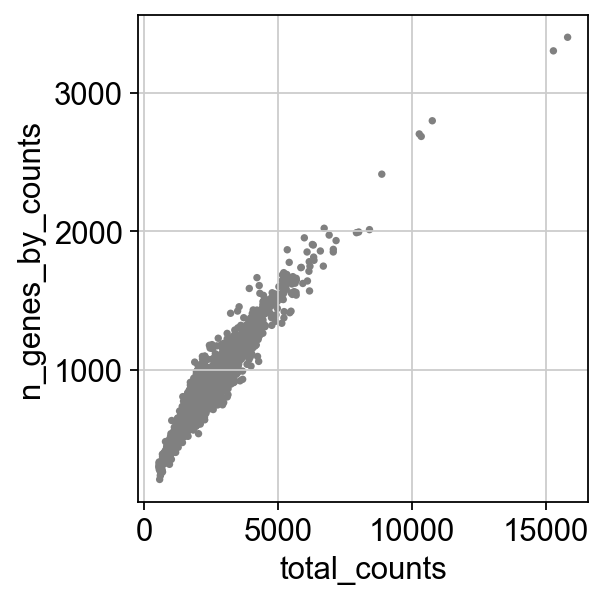

In [166]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [168]:
adata.obs.n_genes_by_counts < 2500

AAACATACAACCAC-1    True
AAACATTGAGCTAC-1    True
AAACATTGATCAGC-1    True
AAACCGTGCTTCCG-1    True
AAACCGTGTATGCG-1    True
                    ... 
TTTCGAACTCTCAT-1    True
TTTCTACTGAGGCA-1    True
TTTCTACTTCCTCG-1    True
TTTGCATGAGAGGC-1    True
TTTGCATGCCTCAC-1    True
Name: n_genes_by_counts, Length: 2700, dtype: bool

In [169]:
adata.obs.pct_counts_mt < 5

AAACATACAACCAC-1    True
AAACATTGAGCTAC-1    True
AAACATTGATCAGC-1    True
AAACCGTGCTTCCG-1    True
AAACCGTGTATGCG-1    True
                    ... 
TTTCGAACTCTCAT-1    True
TTTCTACTGAGGCA-1    True
TTTCTACTTCCTCG-1    True
TTTGCATGAGAGGC-1    True
TTTGCATGCCTCAC-1    True
Name: pct_counts_mt, Length: 2700, dtype: bool

In [176]:
# filtering out cells

adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [180]:
adata.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACATACAACCAC-1      781                779        2419.0             73.0   
AAACATTGAGCTAC-1     1352               1352        4903.0            186.0   
AAACATTGATCAGC-1     1131               1129        3147.0             28.0   
AAACCGTGCTTCCG-1      960                960        2639.0             46.0   
AAACCGTGTATGCG-1      522                521         980.0             12.0   
...                   ...                ...           ...              ...   
TTTCGAACTCTCAT-1     1155               1153        3459.0             73.0   
TTTCTACTGAGGCA-1     1227               1224        3443.0             32.0   
TTTCTACTTCCTCG-1      622                622        1684.0             37.0   
TTTGCATGAGAGGC-1      454                452        1022.0             21.0   
TTTGCATGCCTCAC-1      724                723        1984.0             16.0   

                  pct_counts_mt  
AAACATACAACCAC-1       3.017776  
AAACATTGAGCTAC-1       3.793596  
AAACATTGATCAGC-1       0.889736  
AAACCGTGCTTCCG-1       1.743085  
AAACCGTGTATGCG-1       1.224490  
...                         ...  
TTTCGAACTCTCAT-1       2.110436  
TTTCTACTGAGGCA-1       0.929422  
TTTCTACTTCCTCG-1       2.197150  
TTTGCATGAGAGGC-1       2.054795  
TTTGCATGCCTCAC-1       0.806452  

[2638 rows x 5 columns]

In [177]:
sum(adata.obs.n_genes_by_counts < 2500)

2638

In [183]:
# Normalization
# target_sum=1e4 : specifies the target sum (1e4) of counts for each cell, meaning that the total counts will be scaled to 10,000

sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [184]:
adata.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACATACAACCAC-1      781                779        2419.0             73.0   
AAACATTGAGCTAC-1     1352               1352        4903.0            186.0   
AAACATTGATCAGC-1     1131               1129        3147.0             28.0   
AAACCGTGCTTCCG-1      960                960        2639.0             46.0   
AAACCGTGTATGCG-1      522                521         980.0             12.0   
...                   ...                ...           ...              ...   
TTTCGAACTCTCAT-1     1155               1153        3459.0             73.0   
TTTCTACTGAGGCA-1     1227               1224        3443.0             32.0   
TTTCTACTTCCTCG-1      622                622        1684.0             37.0   
TTTGCATGAGAGGC-1      454                452        1022.0             21.0   
TTTGCATGCCTCAC-1      724                723        1984.0             16.0   

                  pct_counts_mt  
AAACATACAACCAC-1       3.017776  
AAACATTGAGCTAC-1       3.793596  
AAACATTGATCAGC-1       0.889736  
AAACCGTGCTTCCG-1       1.743085  
AAACCGTGTATGCG-1       1.224490  
...                         ...  
TTTCGAACTCTCAT-1       2.110436  
TTTCTACTGAGGCA-1       0.929422  
TTTCTACTTCCTCG-1       2.197150  
TTTGCATGAGAGGC-1       2.054795  
TTTGCATGCCTCAC-1       0.806452  

[2638 rows x 5 columns]

In [19]:
# To check the names of columns of obs
adata.obs.columns

Index(['n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt',
       'pct_counts_mt'],
      dtype='object')

In [20]:
# Log transformation
## Why Logarithmize the data? 1. Variance stabilization 2. Mitigating the impact of highly expresed genes 3. Linearizing multiplicative relationships 4. Improving data normality
sc.pp.log1p(adata)

In [21]:
# Identify highly-variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [22]:
# check the new columns after sc.pp.highly_variable_genes()
adata.var.head(5)

gene_ids  n_cells     mt  n_cells_by_counts  \
AL627309.1     ENSG00000237683        9  False                  9   
AP006222.2     ENSG00000228463        3  False                  3   
RP11-206L10.2  ENSG00000228327        5  False                  5   
RP11-206L10.9  ENSG00000237491        3  False                  3   
LINC00115      ENSG00000225880       18  False                 18   

               mean_counts  pct_dropout_by_counts  total_counts  \
AL627309.1        0.003333              99.666667           9.0   
AP006222.2        0.001111              99.888889           3.0   
RP11-206L10.2     0.001852              99.814815           5.0   
RP11-206L10.9     0.001111              99.888889           3.0   
LINC00115         0.006667              99.333333          18.0   

               highly_variable     means  dispersions  dispersions_norm  
AL627309.1               False  0.003328    -0.002968         -0.462731  
AP006222.2               False  0.001110    -0.000741         -0.458968  
RP11-206L10.2            False  0.001850    -0.001483         -0.460221  
RP11-206L10.9            False  0.001110    -0.000741         -0.458968  
LINC00115                False  0.006645    -0.006319         -0.468393

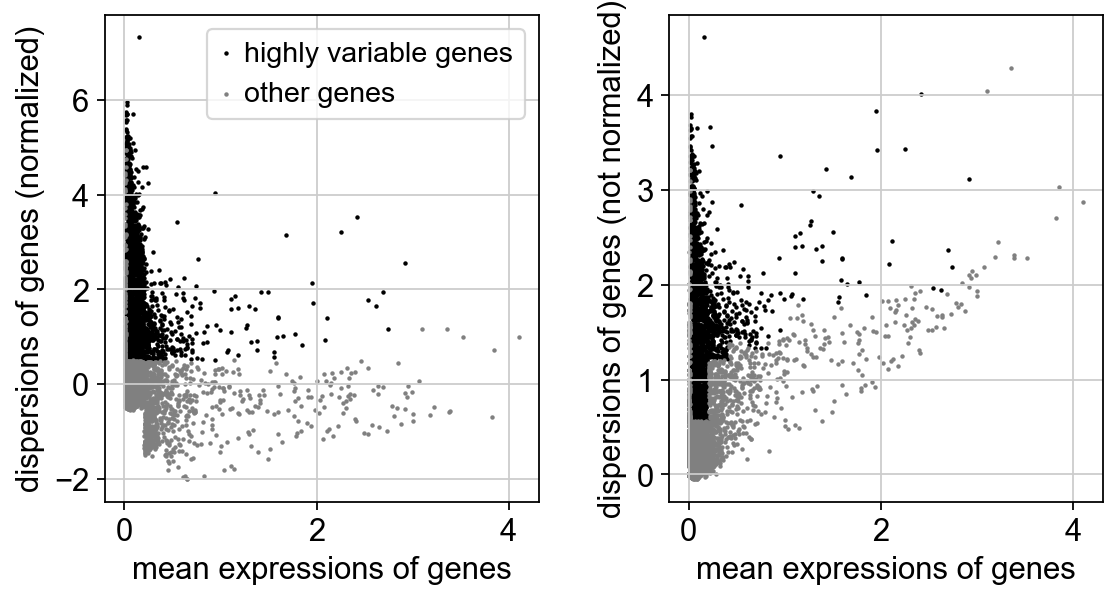

In [23]:
# Visualization of highly variable genes
sc.pl.highly_variable_genes(adata)

In [24]:
# Actually, do the filtering (if adata.var.highly_variable is false, it will be filtered out)
# highly_variable is boolean
# adata.var.highly_variable = adata.var['highly_variable']

adata = adata[:, adata.var.highly_variable]

In [25]:
# As you can see the highly_variable column, there is no false
adata.var

gene_ids  n_cells     mt  n_cells_by_counts  mean_counts  \
HES4     ENSG00000188290      145  False                145     0.078889   
ISG15    ENSG00000187608     1206  False               1206     1.195556   
TNFRSF4  ENSG00000186827      155  False                155     0.077407   
CPSF3L   ENSG00000127054      202  False                202     0.094815   
MRPL20   ENSG00000242485      677  False                677     0.337778   
...                  ...      ...    ...                ...          ...   
SLC19A1  ENSG00000173638       31  False                 31     0.018519   
S100B    ENSG00000160307       94  False                 94     0.076667   
MT-CO1   ENSG00000198804     2686   True               2686    14.515185   
MT-CO2   ENSG00000198712     2460   True               2460     7.068148   
MT-ND6   ENSG00000198695      249   True                249     0.110370   

         pct_dropout_by_counts  total_counts  highly_variable     means  \
HES4                 94.629630         213.0             True  0.075932   
ISG15                55.333333        3228.0             True  0.786435   
TNFRSF4              94.259259         209.0             True  0.074558   
CPSF3L               92.518519         256.0             True  0.090585   
MRPL20               74.925926         912.0             True  0.291010   
...                        ...           ...              ...       ...   
SLC19A1              98.851852          50.0             True  0.018349   
S100B                96.518519         207.0             True  0.073870   
MT-CO1                0.518519       39191.0             True  2.741819   
MT-CO2                8.888889       19084.0             True  2.087924   
MT-ND6               90.777778         298.0             True  0.104694   

         dispersions  dispersions_norm  
HES4        0.610842          0.574587  
ISG15       1.774774          1.705018  
TNFRSF4     0.737562          0.788739  
CPSF3L      1.962733          2.859239  
MRPL20      1.530411          1.029025  
...              ...               ...  
SLC19A1     2.149977          3.175674  
S100B       1.402398          1.912290  
MT-CO1      2.181952          1.169195  
MT-CO2      2.215674          0.932840  
MT-ND6      1.279727          1.704981  

[1915 rows x 11 columns]

In [26]:
# Regress out (remove) effects of unwanted variables from the expression data. The aim is to mitigate the impact of these variables on downstream analysis
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:08)


In [27]:
# Although 'total_counts' & 'pct_counts_mt' are regressed out, those still exist in adata.
adata.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACATACAACCAC-1      781                779        2419.0             73.0   
AAACATTGAGCTAC-1     1352               1352        4903.0            186.0   
AAACATTGATCAGC-1     1131               1129        3147.0             28.0   
AAACCGTGCTTCCG-1      960                960        2639.0             46.0   
AAACCGTGTATGCG-1      522                521         980.0             12.0   
...                   ...                ...           ...              ...   
TTTCGAACTCTCAT-1     1155               1153        3459.0             73.0   
TTTCTACTGAGGCA-1     1227               1224        3443.0             32.0   
TTTCTACTTCCTCG-1      622                622        1684.0             37.0   
TTTGCATGAGAGGC-1      454                452        1022.0             21.0   
TTTGCATGCCTCAC-1      724                723        1984.0             16.0   

                  pct_counts_mt  
AAACATACAACCAC-1       3.017776  
AAACATTGAGCTAC-1       3.793596  
AAACATTGATCAGC-1       0.889736  
AAACCGTGCTTCCG-1       1.743085  
AAACCGTGTATGCG-1       1.224490  
...                         ...  
TTTCGAACTCTCAT-1       2.110436  
TTTCTACTGAGGCA-1       0.929422  
TTTCTACTTCCTCG-1       2.197150  
TTTGCATGAGAGGC-1       2.054795  
TTTGCATGCCTCAC-1       0.806452  

[2700 rows x 5 columns]

In [28]:
# This function standardizes the expression data of each gene to have zero mean and unit variance.
# So, the goal of the scaling is to ensure that each gene contributes equally to downstream analysis by giving them the same weight.
# Necessary before dimensionality reduction

sc.pp.scale(adata, max_value=10) # this parameter is to limit the maximum value of the scaled data

In [29]:
# after scaling data, mean % std were added in adata.var
adata.var.head(5)

gene_ids  n_cells     mt  n_cells_by_counts  mean_counts  \
HES4     ENSG00000188290      145  False                145     0.078889   
ISG15    ENSG00000187608     1206  False               1206     1.195556   
TNFRSF4  ENSG00000186827      155  False                155     0.077407   
CPSF3L   ENSG00000127054      202  False                202     0.094815   
MRPL20   ENSG00000242485      677  False                677     0.337778   

         pct_dropout_by_counts  total_counts  highly_variable     means  \
HES4                 94.629630         213.0             True  0.075932   
ISG15                55.333333        3228.0             True  0.786435   
TNFRSF4              94.259259         209.0             True  0.074558   
CPSF3L               92.518519         256.0             True  0.090585   
MRPL20               74.925926         912.0             True  0.291010   

         dispersions  dispersions_norm          mean       std  
HES4        0.610842          0.574587 -1.437419e-10  0.196978  
ISG15       1.774774          1.705018 -1.495694e-10  0.610250  
TNFRSF4     0.737562          0.788739 -8.706896e-11  0.197077  
CPSF3L      1.962733          2.859239 -5.243001e-11  0.203407  
MRPL20      1.530411          1.029025 -1.931632e-11  0.353710

In [30]:
# PCA
# 'arpack' : one of the solver. This is suitable for smaller datasets. cf. 'randomized' for larger datasets


sc.tl.pca(adata, svd_solver = 'arpack') # tl (tool), svd (singular value decomposition)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


In [31]:
adata

# uns (Unstructured), obsm (Observation Matrix), varm (Variable Matrix)

AnnData object with n_obs × n_vars = 2700 × 1915
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

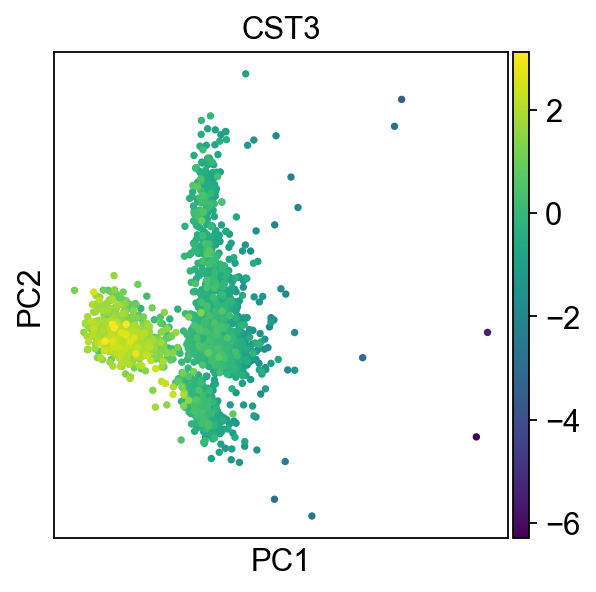

In [32]:
sc.pl.pca(adata, color = 'CST3')

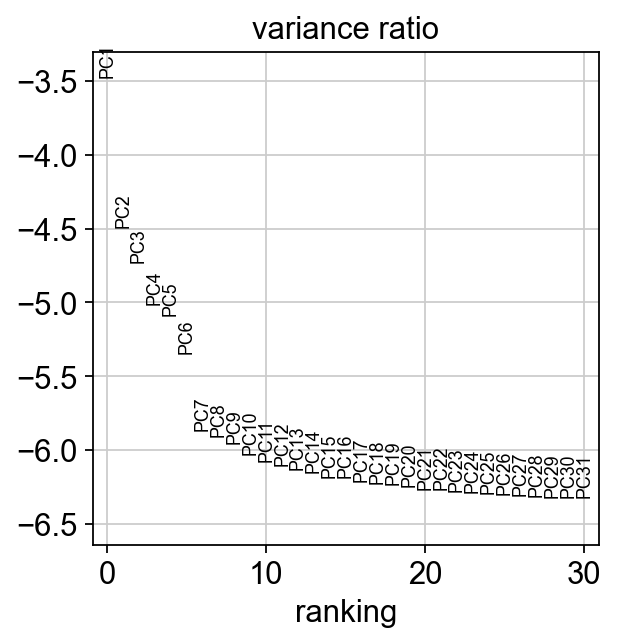

In [33]:
sc.pl.pca_variance_ratio(adata, log=True)

In [34]:
## Computing the neighborhood graph

sc.pp.neighbors (adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [35]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


In [36]:
## Embedding the neighborhood graph

sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)
sc.tl.umap(adata, init_pos='paga')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


In [37]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


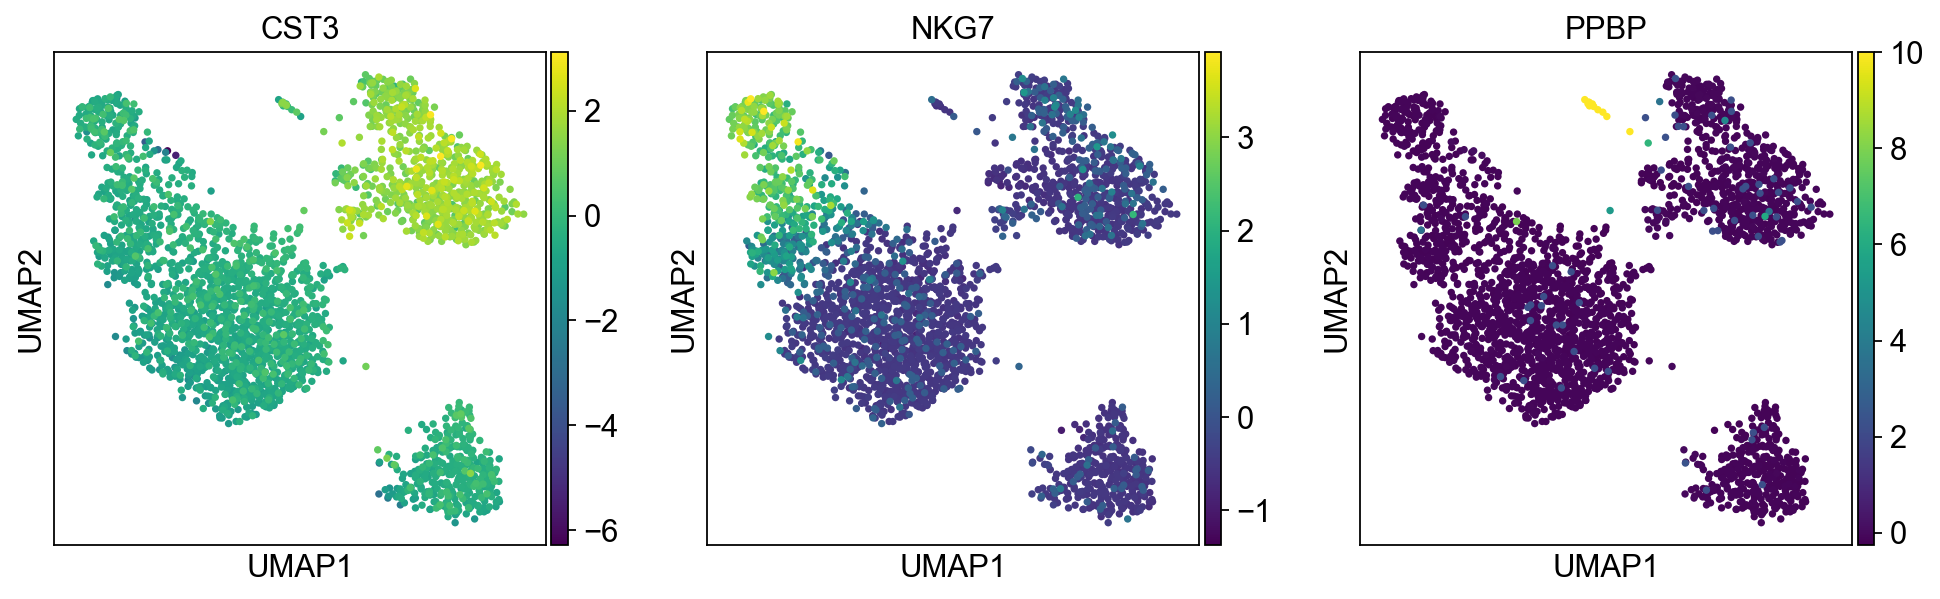

In [38]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

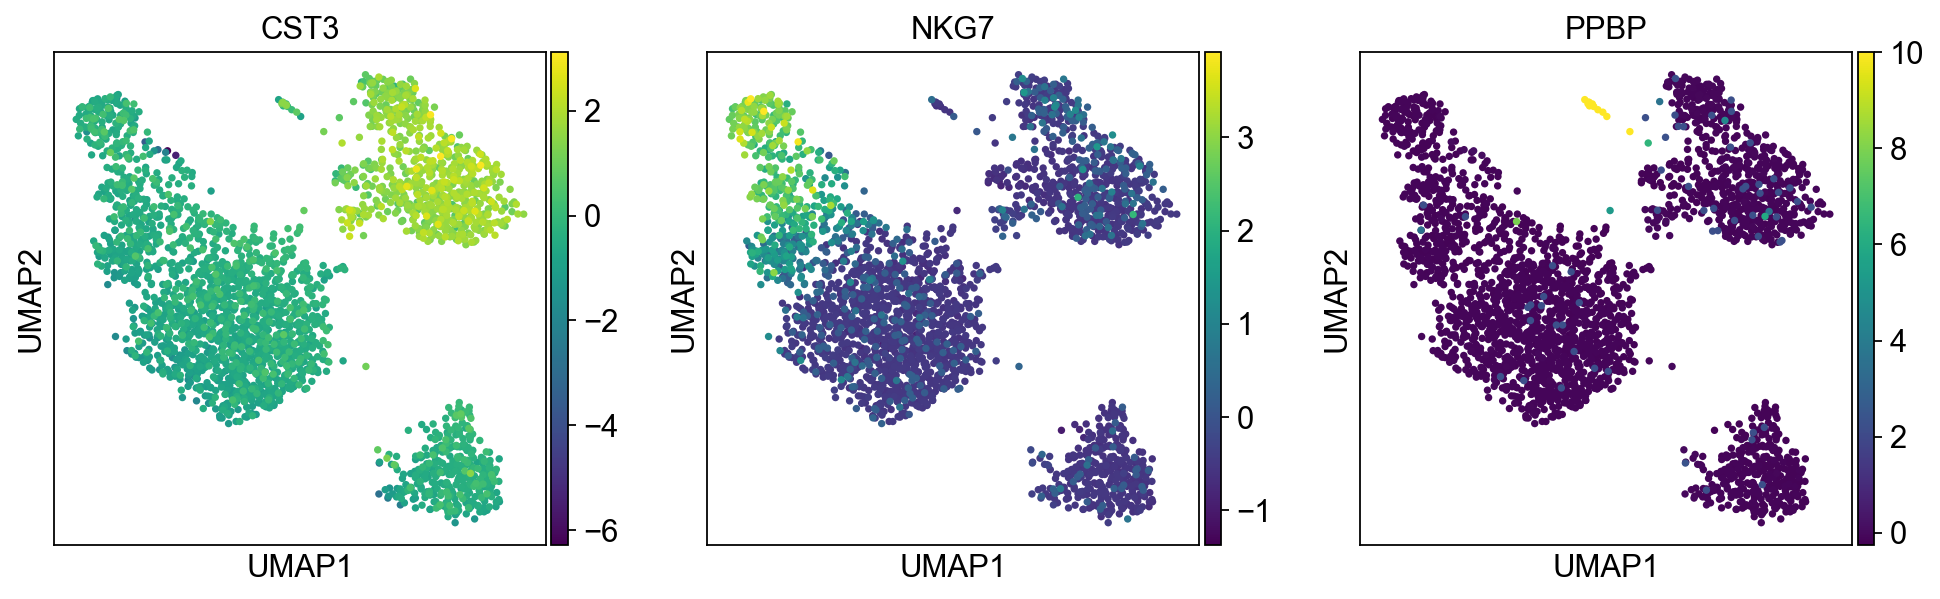

In [39]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

In [40]:
# the Leiden graph-clustering method is recommended (community detection based on optimizing modularity) by Traag et al. (2018)
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


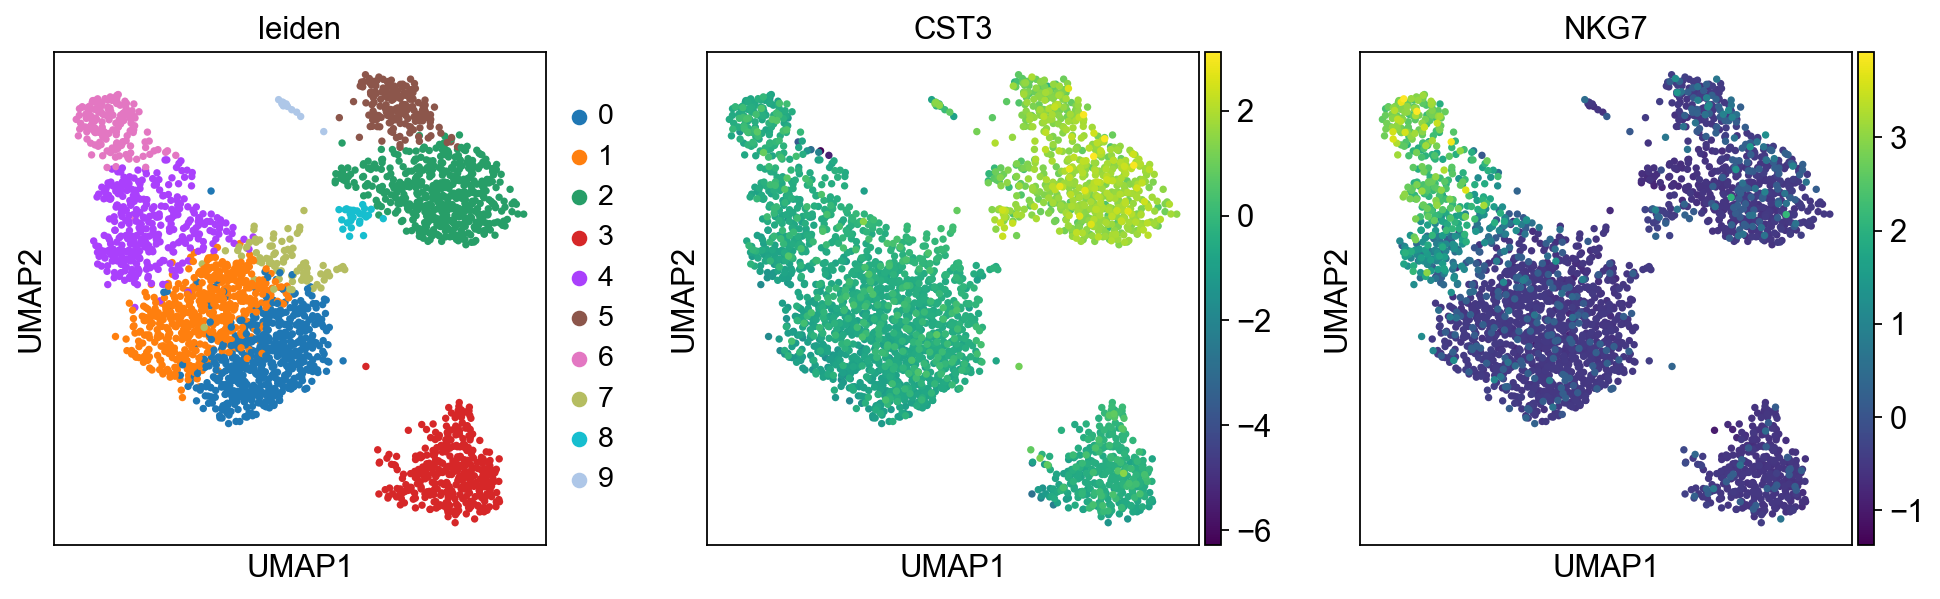

In [41]:
# color by leiden clustering & CST3, NKG7 gene

sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

In [42]:
adata.write('results_file.h5ad')

In [43]:
# Finding marker genes by rank_genes_group()

sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.l

In [44]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:01)


/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.l

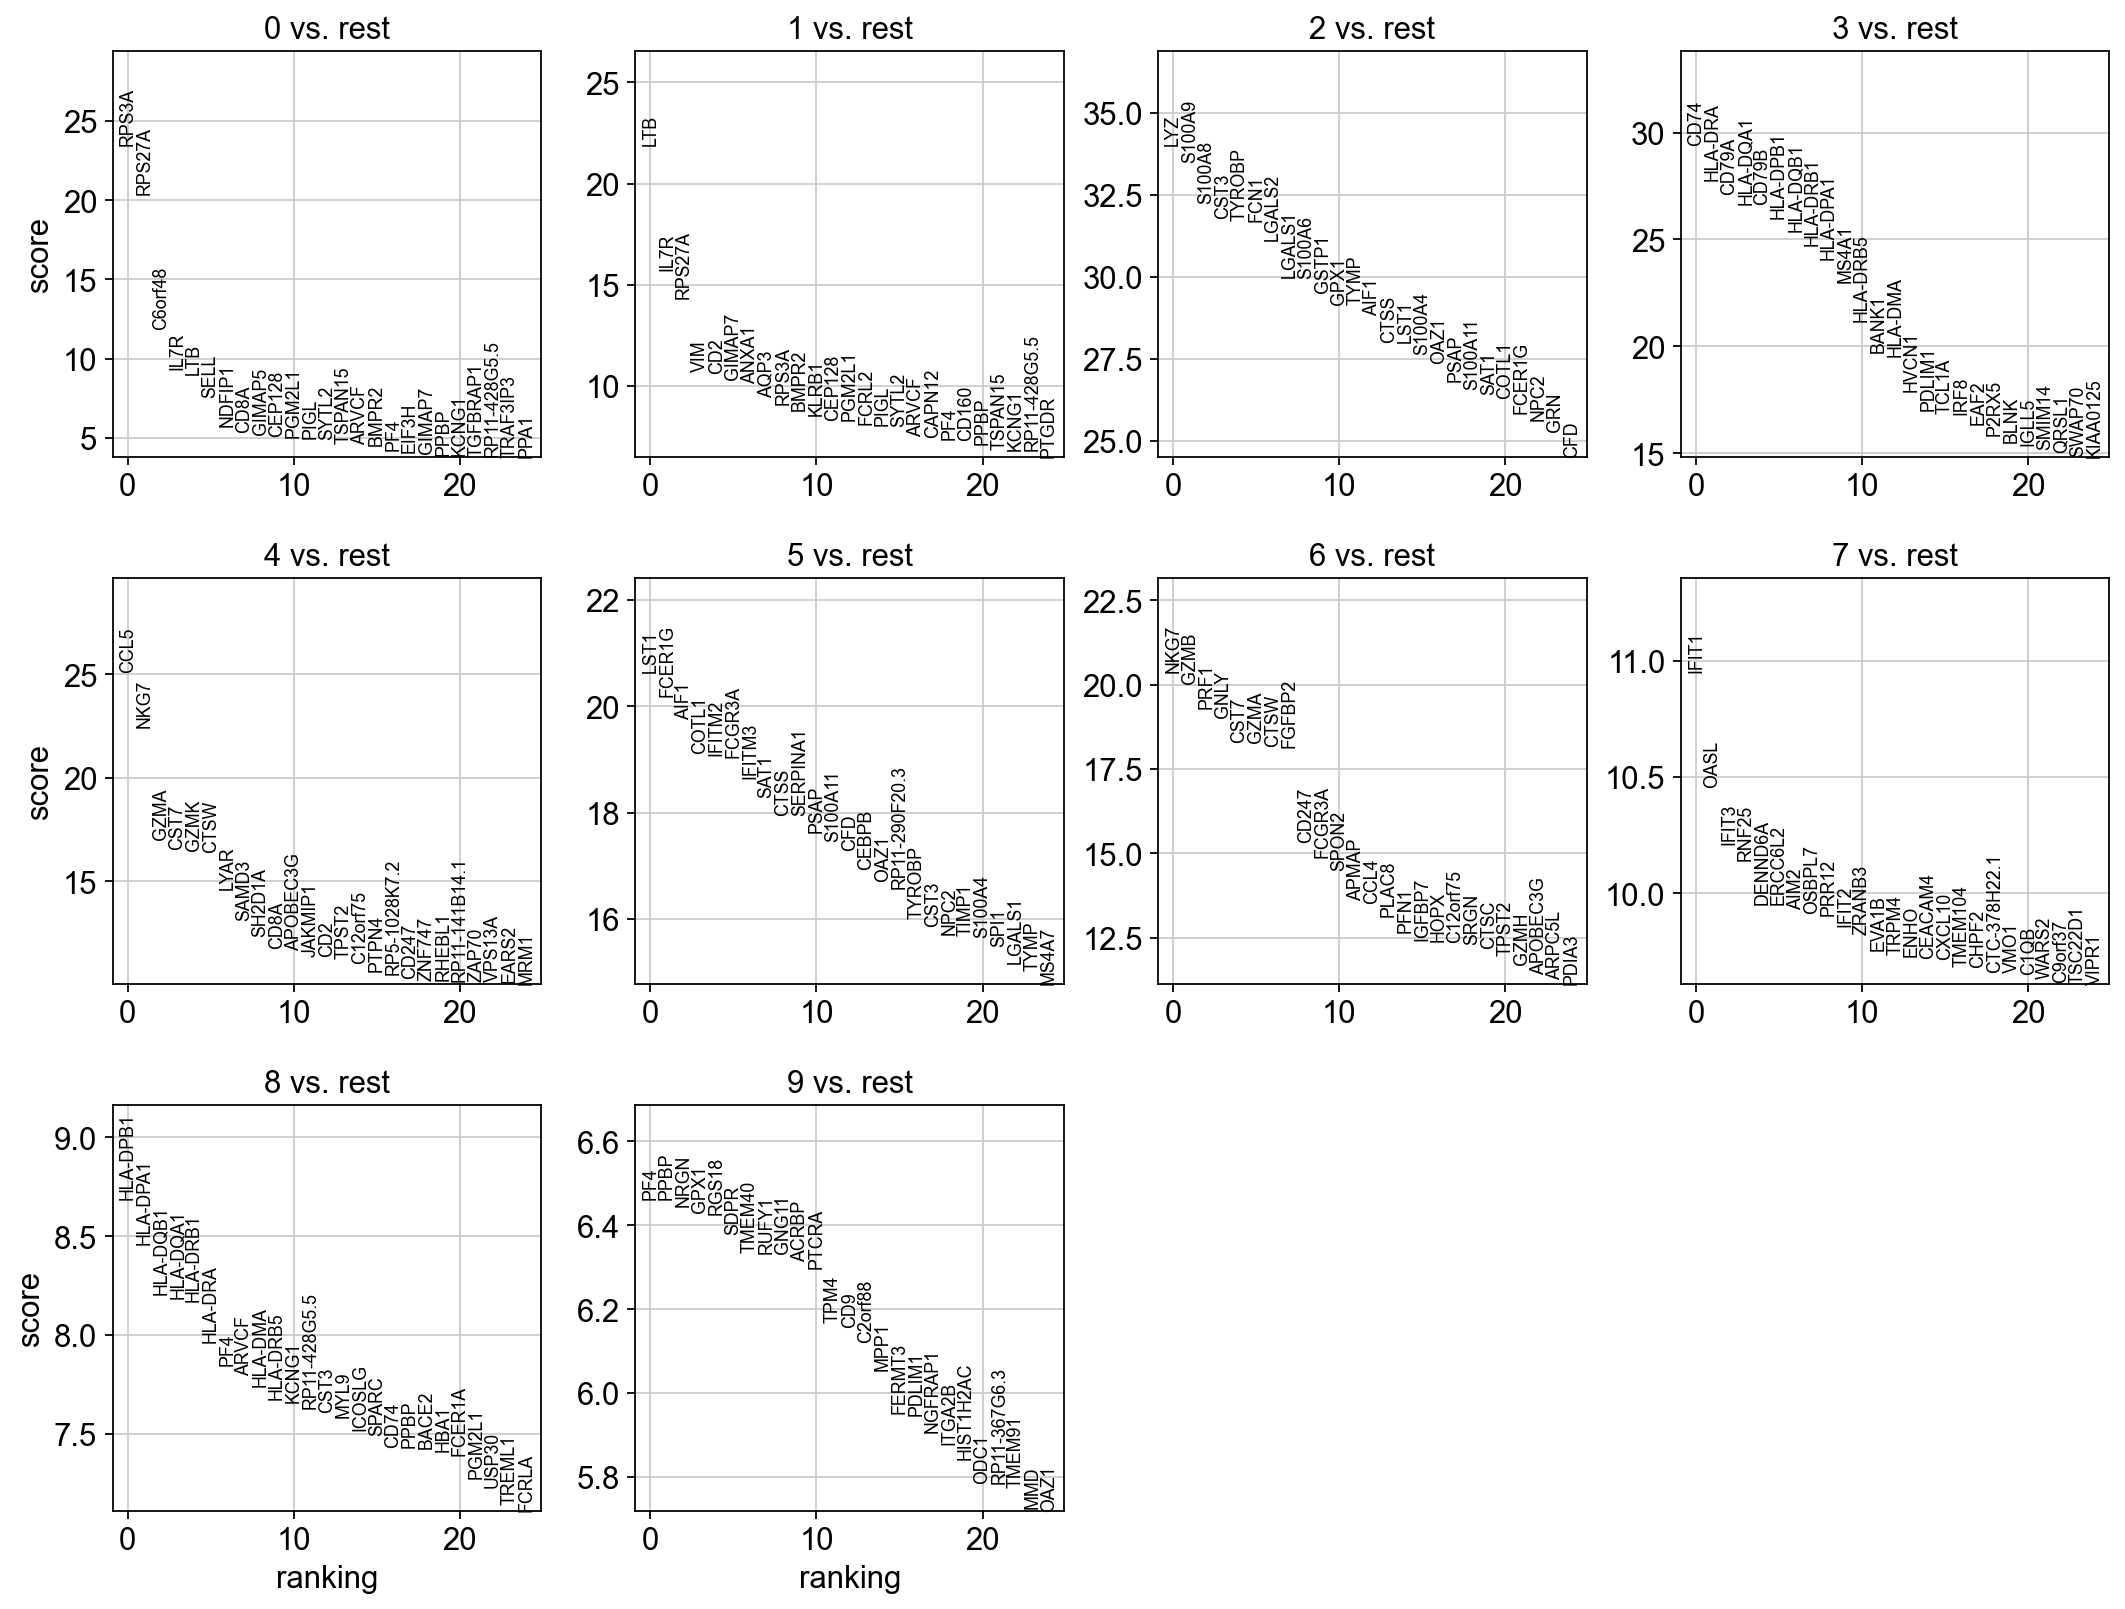

In [45]:
# The result of a Wilcoxon rank-sum (Mann-Whitney-U) test is very similar. We recommend using the latter in publications, see e.g., Sonison & Robinson (2018).
# You might also consider much more powerful differential testing packages like MAST, limma, DESeq2 and, for python, the recent diffxpy.

sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [46]:
adata.write('results_file.h5ad')

In [47]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished (0:00:03)


/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [49]:
adata = sc.read('results_file.h5ad')

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [50]:
adata

AnnData object with n_obs × n_vars = 2700 × 1915
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [51]:
# Show the 10 top ranked genes per cluster 0, 1, …, 7 in a dataframe.

pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)                                                        

0       1       2         3     4       5     6        7         8  \
0    RPS3A     LTB     LYZ      CD74  CCL5    LST1  NKG7    IFIT1  HLA-DPB1   
1   RPS27A    IL7R  S100A9   HLA-DRA  NKG7  FCER1G  GZMB     OASL  HLA-DPA1   
2  C6orf48  RPS27A  S100A8     CD79A  GZMA    AIF1  PRF1    IFIT3  HLA-DQB1   
3     IL7R     VIM    CST3  HLA-DQA1  CST7   COTL1  GNLY    RNF25  HLA-DQA1   
4      LTB     CD2  TYROBP     CD79B  GZMK  IFITM2  CST7  DENND6A  HLA-DRB1   

       9  
0    PF4  
1   PPBP  
2   NRGN  
3   GPX1  
4  RGS18

In [52]:
adata.uns['rank_genes_groups']['names']

array([('RPS3A', 'LTB', 'LYZ', 'CD74', 'CCL5', 'LST1', 'NKG7', 'IFIT1', 'HLA-DPB1', 'PF4'),
       ('RPS27A', 'IL7R', 'S100A9', 'HLA-DRA', 'NKG7', 'FCER1G', 'GZMB', 'OASL', 'HLA-DPA1', 'PPBP'),
       ('C6orf48', 'RPS27A', 'S100A8', 'CD79A', 'GZMA', 'AIF1', 'PRF1', 'IFIT3', 'HLA-DQB1', 'NRGN'),
       ...,
       ('LGALS1', 'HLA-DRA', 'RPS3A', 'CTSW', 'FCER2', 'P2RX5', 'COTL1', 'HBA1', 'GRAP2', 'TMSB10'),
       ('HLA-DRB1', 'HLA-DRB5', 'LTB', 'S100A6', 'MS4A1', 'GPR183', 'VIM', 'FGFBP2', 'TRABD2A', 'RPS3A'),
       ('S100A4', 'HLA-DRB1', 'RPS27A', 'S100A4', 'TMSB10', 'ACAP1', 'LTB', 'VPREB3', 'PBXIP1', 'RPS27A')],
      dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O'), ('7', 'O'), ('8', 'O'), ('9', 'O')])

In [53]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
             for group in groups for key in ['names', 'pvals']}).head(5)
                                                                    

0_n            0_p     1_n            1_p     2_n            2_p  \
0    RPS3A  4.810948e-122     LTB  2.048812e-106     LYZ  1.132138e-253   
1   RPS27A   3.510535e-92    IL7R   6.885164e-56  S100A9  3.180810e-246   
2  C6orf48   1.919324e-32  RPS27A   8.539361e-47  S100A8  3.212079e-228   
3     IL7R   9.780487e-21     VIM   8.590115e-27    CST3  8.221931e-222   
4      LTB   1.878219e-19     CD2   1.613929e-26  TYROBP  6.406961e-221   

        3_n            3_p   4_n            4_p     5_n           5_p   6_n  \
0      CD74  2.829390e-190  CCL5  2.794990e-139    LST1  1.130675e-94  NKG7   
1   HLA-DRA  4.686511e-170  NKG7  7.221415e-112  FCER1G  1.122489e-90  GZMB   
2     CD79A  4.967654e-162  GZMA   3.984053e-65    AIF1  7.217685e-87  PRF1   
3  HLA-DQA1  8.205130e-157  CST7   1.425277e-61   COTL1  2.037372e-81  GNLY   
4     CD79B  9.019718e-157  GZMK   2.130069e-61  IFITM2  4.104635e-81  CST7   

            6_p      7_n           7_p       8_n           8_p    9_n  \
0  2.587058e-92    IFIT1  6.544152e-28  HLA-DPB1  3.666827e-18    PF4   
1  1.627604e-89     OASL  1.398269e-25  HLA-DPA1  2.636469e-17   PPBP   
2  4.403558e-83    IFIT3  1.747542e-24  HLA-DQB1  2.289458e-16   NRGN   
3  6.359438e-81    RNF25  3.540115e-24  HLA-DQA1  2.738778e-16   GPX1   
4  6.636021e-75  DENND6A  2.392695e-23  HLA-DRB1  3.012879e-16  RGS18   

            9_p  
0  1.028373e-10  
1  1.028373e-10  
2  1.154555e-10  
3  1.261141e-10  
4  1.301701e-10

ranking genes
    finished (0:00:00)


/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


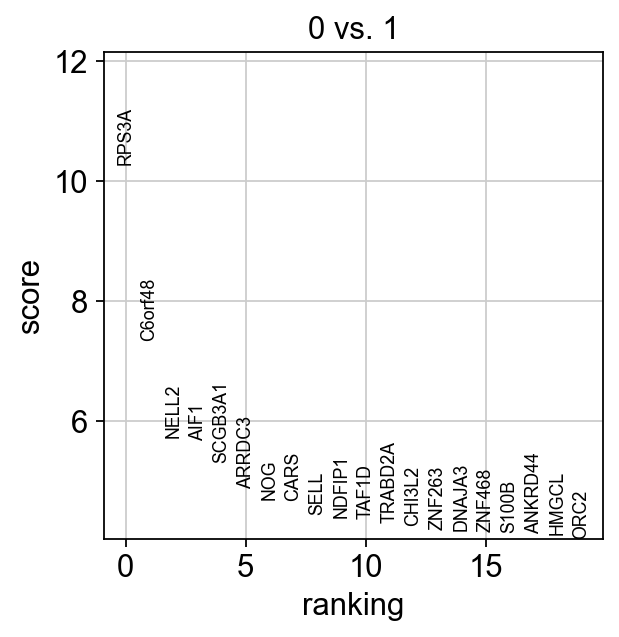

In [54]:
# Compare to a single cluster

sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

In [55]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


In [56]:
adata = sc.read('results_file.h5ad')

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


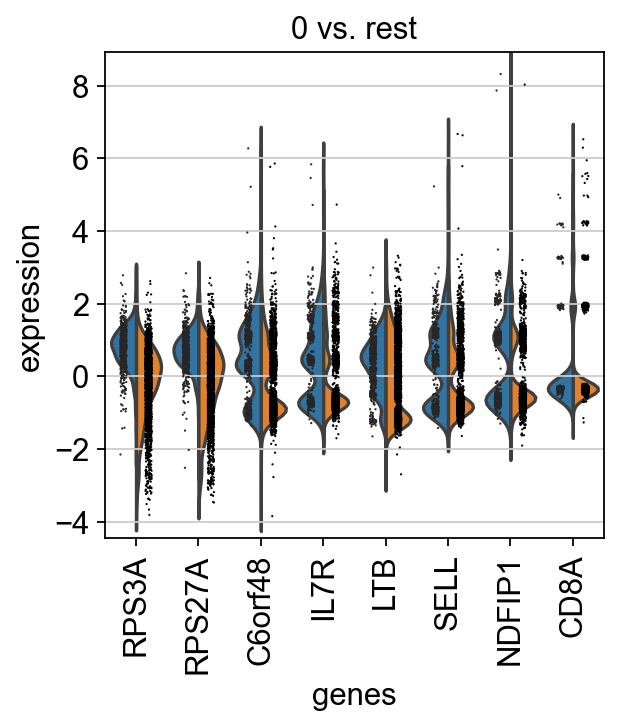

In [57]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [58]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

In [59]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)

ValueError: new categories need to have the same number of items as the old categories!

In [60]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [61]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

KeyError: "Could not find keys '['CD14', 'CD8B']' in columns of `adata.obs` or in adata.var_names."

In [62]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

KeyError: "Could not find keys '['CD14', 'CD8B']' in columns of `adata.obs` or in adata.var_names."

In [63]:
adata

AnnData object with n_obs × n_vars = 2700 × 1915
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [81]:
adata.write('results_file.h5ad')